In [1]:
#temporary seperate import until plotly install issue is addressed.
import pandas as pd

In [2]:
#importing dependencies for workbook
import pandas as pd
import plotly.express as px

In [3]:
#importing csv files for computing branch metrics and branch locations
branchMetrics = pd.read_csv('../can-summer-2023/data/clean/branch_metrics.csv')
branchLocations = pd.read_csv('../can-summer-2023/data/clean/branches.csv')

#checking branchMetrics
branchMetrics.head()

,BRANCH,YEAR,MONTH,CIRCULATION,COMPUTER_SESSIONS,VISITORS
0,Albany Park,2011,1,8427.0,1666.0,9604.0
1,Albany Park,2011,2,7023.0,1296.0,10500.0
2,Albany Park,2011,3,9702.0,1735.0,9050.0
3,Albany Park,2011,4,9344.0,1841.0,9300.0
4,Albany Park,2011,5,8865.0,1683.0,8271.0


In [4]:
#checking branchLocations
branchLocations.head()

,BRANCH,HOURS OF OPERATION,ADDRESS,CITY,STATE,ZIP,PHONE,WEBSITE,LOCATION,PERMANENTLY_CLOSED
0,Albany Park,"Mon. & Wed., 10-6; Tues. & Thurs., Noon-8; Fri...",3401 W. Foster Ave.,Chicago,IL,60625,(773) 539-5450,https://www.chipublib.org/locations/3/,"(41.97557881655979, -87.71361314512697)",0
1,Altgeld,"Mon. & Wed., Noon-8; Tues. & Thurs., 10-6; Fri...",955 E. 131st Street,Chicago,IL,60827,(312) 747-3270,https://www.chipublib.org/locations/4/,"(41.65719847558056, -87.59883829075173)",0
2,Archer Heights,"Mon. & Wed., Noon-8; Tues. & Thurs., 10-6; Fri...",5055 S. Archer Ave.,Chicago,IL,60632,(312) 747-9241,https://www.chipublib.org/locations/5/,"(41.80110836194246, -87.72648385568911)",0
3,Austin,"Mon. & Wed., Noon-8; Tues. & Thurs., 10-6; Fri...",5615 W. Race Ave.,Chicago,IL,60644,(312) 746-5038,https://www.chipublib.org/locations/6/,"(41.88917312206642, -87.7658203582574)",0
4,Austin-Irving,"Mon. & Wed., Noon-8; Tues. & Thurs., 10-6; Fri...",6100 W. Irving Park Rd.,Chicago,IL,60634,(312) 744-6222,https://www.chipublib.org/locations/7/,"(41.95312267684315, -87.77928489355646)",0


In [5]:
#Removing rows with no data
#checking shape before dropping na values
print(branchMetrics.shape)
branchMetrics = branchMetrics.dropna(subset = ['COMPUTER_SESSIONS', 'VISITORS'])
#checking data after dropping na values for computer and visitors column. 
branchMetrics

(11880, 6)


,BRANCH,YEAR,MONTH,CIRCULATION,COMPUTER_SESSIONS,VISITORS
0,Albany Park,2011,1,8427.0,1666.0,9604.0
1,Albany Park,2011,2,7023.0,1296.0,10500.0
2,Albany Park,2011,3,9702.0,1735.0,9050.0
3,Albany Park,2011,4,9344.0,1841.0,9300.0
4,Albany Park,2011,5,8865.0,1683.0,8271.0
...,...,...,...,...,...,...
11875,Wrightwood-Ashburn,2022,12,575.0,511.0,1410.0
11876,Wrightwood-Ashburn,2023,1,658.0,577.0,1625.0
11877,Wrightwood-Ashburn,2023,2,683.0,561.0,12146.0
11878,Wrightwood-Ashburn,2023,3,834.0,806.0,6312.0


In [6]:
#Removing rows with 0 in the COMPUTER_SESSIOONS and VISITORS column
branchMetrics = branchMetrics[(branchMetrics['VISITORS'] > 0) & (branchMetrics['COMPUTER_SESSIONS'] > 0)]
branchMetrics

,BRANCH,YEAR,MONTH,CIRCULATION,COMPUTER_SESSIONS,VISITORS
0,Albany Park,2011,1,8427.0,1666.0,9604.0
1,Albany Park,2011,2,7023.0,1296.0,10500.0
2,Albany Park,2011,3,9702.0,1735.0,9050.0
3,Albany Park,2011,4,9344.0,1841.0,9300.0
4,Albany Park,2011,5,8865.0,1683.0,8271.0
...,...,...,...,...,...,...
11875,Wrightwood-Ashburn,2022,12,575.0,511.0,1410.0
11876,Wrightwood-Ashburn,2023,1,658.0,577.0,1625.0
11877,Wrightwood-Ashburn,2023,2,683.0,561.0,12146.0
11878,Wrightwood-Ashburn,2023,3,834.0,806.0,6312.0


In [7]:
branchMetrics.BRANCH.unique().size

81

In [8]:
#getting sums of Circulation, Computer_Sessions, and Visitors in each branch by year
metricsByYear = branchMetrics.groupby(['YEAR','BRANCH']).sum()
metricsByYear

MONTH  CIRCULATION  COMPUTER_SESSIONS  VISITORS
YEAR BRANCH                                                                
2011 Albany Park               78     120059.0            21966.0  117425.0
     Altgeld                   78       9611.0            31782.0   58657.0
     Archer Heights            78     101951.0            25321.0  124653.0
     Austin                    78      25527.0            33207.0  102306.0
     Austin-Irving             78     165634.0            35093.0  145852.0
...                           ...          ...                ...       ...
2023 West Pullman              10       3325.0             4629.0   23966.0
     West Town                 10      18885.0             4329.0   29180.0
     Whitney M. Young, Jr.     10       3068.0             6402.0   14232.0
     Woodson Regional          10       8480.0            12663.0   24108.0
     Wrightwood-Ashburn        10       3213.0             2701.0   24157.0

[1012 rows x 4 columns]

In [9]:
#Resetting the index for metricsByYear and mergind with location data
metricsByYear.reset_index(inplace = True)
metricsByYear

,YEAR,BRANCH,MONTH,CIRCULATION,COMPUTER_SESSIONS,VISITORS
0,2011,Albany Park,78,120059.0,21966.0,117425.0
1,2011,Altgeld,78,9611.0,31782.0,58657.0
2,2011,Archer Heights,78,101951.0,25321.0,124653.0
3,2011,Austin,78,25527.0,33207.0,102306.0
4,2011,Austin-Irving,78,165634.0,35093.0,145852.0
...,...,...,...,...,...,...
1007,2023,West Pullman,10,3325.0,4629.0,23966.0
1008,2023,West Town,10,18885.0,4329.0,29180.0
1009,2023,"Whitney M. Young, Jr.",10,3068.0,6402.0,14232.0
1010,2023,Woodson Regional,10,8480.0,12663.0,24108.0


In [10]:
metricsByYear.BRANCH.unique().size

81

In [11]:
metricsByYear = metricsByYear.merge(branchLocations)
metricsByYear

,YEAR,BRANCH,MONTH,CIRCULATION,COMPUTER_SESSIONS,VISITORS,HOURS OF OPERATION,ADDRESS,CITY,STATE,ZIP,PHONE,WEBSITE,LOCATION,PERMANENTLY_CLOSED
0,2011,Albany Park,78,120059.0,21966.0,117425.0,"Mon. & Wed., 10-6; Tues. & Thurs., Noon-8; Fri...",3401 W. Foster Ave.,Chicago,IL,60625,(773) 539-5450,https://www.chipublib.org/locations/3/,"(41.97557881655979, -87.71361314512697)",0
1,2012,Albany Park,45,83192.0,15423.0,78485.0,"Mon. & Wed., 10-6; Tues. & Thurs., Noon-8; Fri...",3401 W. Foster Ave.,Chicago,IL,60625,(773) 539-5450,https://www.chipublib.org/locations/3/,"(41.97557881655979, -87.71361314512697)",0
2,2014,Albany Park,42,50260.0,9546.0,53058.0,"Mon. & Wed., 10-6; Tues. & Thurs., Noon-8; Fri...",3401 W. Foster Ave.,Chicago,IL,60625,(773) 539-5450,https://www.chipublib.org/locations/3/,"(41.97557881655979, -87.71361314512697)",0
3,2015,Albany Park,78,133366.0,37114.0,153751.0,"Mon. & Wed., 10-6; Tues. & Thurs., Noon-8; Fri...",3401 W. Foster Ave.,Chicago,IL,60625,(773) 539-5450,https://www.chipublib.org/locations/3/,"(41.97557881655979, -87.71361314512697)",0
4,2016,Albany Park,78,135858.0,37025.0,159397.0,"Mon. & Wed., 10-6; Tues. & Thurs., Noon-8; Fri...",3401 W. Foster Ave.,Chicago,IL,60625,(773) 539-5450,https://www.chipublib.org/locations/3/,"(41.97557881655979, -87.71361314512697)",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2022,West Loop,78,52688.0,4784.0,51137.0,"Mon. & Wed., 10-6; Tues. & Thurs., Noon-8; Fri...",122 N. Aberdeen St.,Chicago,IL,60607,(312) 744-2995,https://www.chipublib.org/locations/88/,"(41.8837105009142, -87.6545650515331)",0
996,2023,West Loop,10,18737.0,1637.0,23173.0,"Mon. & Wed., 10-6; Tues. & Thurs., Noon-8; Fri...",122 N. Aberdeen St.,Chicago,IL,60607,(312) 744-2995,https://www.chipublib.org/locations/88/,"(41.8837105009142, -87.6545650515331)",0
997,2021,Water Works,42,8516.0,306.0,10594.0,"Mon. - Thurs., 10-6; Fri. & Sat., 9-5; Sun., 1-5",163 E. Pearson St.,Chicago,IL,60611,(312) 742-8811,https://www.chipublib.org/locations/73/,"(41.897484072390675, -87.62337776811282)",0
998,2022,Water Works,77,35804.0,1864.0,47594.0,"Mon. - Thurs., 10-6; Fri. & Sat., 9-5; Sun., 1-5",163 E. Pearson St.,Chicago,IL,60611,(312) 742-8811,https://www.chipublib.org/locations/73/,"(41.897484072390675, -87.62337776811282)",0


In [12]:
metricsByYear.BRANCH.unique().size

80

In [13]:
#The groupby year and branch data seems to leave out one branch, so we are determining which is left out. I found that Woodson Regional
#was left out because it is called Woodson Regional Library in the branch_metrics.csv and therefore it was lost during the merge.metricsByYear.BRANCH.unique().size
list(set(branchMetrics.BRANCH.unique()) - set(metricsByYear.BRANCH.unique()))

['Woodson Regional']

In [14]:
#Checking branch names before replacing
branchMetrics.BRANCH.unique()

array(['Albany Park', 'Altgeld', 'Archer Heights', 'Austin',
       'Austin-Irving', 'Avalon', 'Back of the Yards', 'Beverly',
       'Bezazian', 'Blackstone', 'Brainerd', 'Brighton Park',
       'Bucktown-Wicker Park', 'Budlong Woods', 'Canaryville',
       'Chicago Bee', 'Chicago Lawn', 'Chinatown', 'Clearing', 'Coleman',
       'Daley, Richard J. - Bridgeport',
       'Daley, Richard M. - W. Humboldt', 'Douglass', 'Dunning',
       'Edgebrook', 'Edgewater', 'Gage Park', 'Garfield Ridge',
       'Greater Grand Crossing', 'Hall',
       'Harold Washington Library Center', 'Hegewisch', 'Humboldt Park',
       'Independence', 'Jefferson Park', 'Jeffery Manor', 'Kelly', 'King',
       'Legler Regional', 'Lincoln Belmont', 'Lincoln Park',
       'Little Italy', 'Little Village', 'Logan Square', 'Lozano',
       'Manning', 'Mayfair', 'McKinley Park', 'Merlo', 'Mount Greenwood',
       'Near North', 'North Austin', 'North Pulaski', 'Northtown',
       'Oriole Park', 'Portage-Cragin', 'Pullm

In [15]:
#replacing the branch name
branchMetrics.loc[branchMetrics.BRANCH == 'Woodson Regional', 'BRANCH'] = 'Woodson Regional Library'
branchMetrics.BRANCH.unique()

array(['Albany Park', 'Altgeld', 'Archer Heights', 'Austin',
       'Austin-Irving', 'Avalon', 'Back of the Yards', 'Beverly',
       'Bezazian', 'Blackstone', 'Brainerd', 'Brighton Park',
       'Bucktown-Wicker Park', 'Budlong Woods', 'Canaryville',
       'Chicago Bee', 'Chicago Lawn', 'Chinatown', 'Clearing', 'Coleman',
       'Daley, Richard J. - Bridgeport',
       'Daley, Richard M. - W. Humboldt', 'Douglass', 'Dunning',
       'Edgebrook', 'Edgewater', 'Gage Park', 'Garfield Ridge',
       'Greater Grand Crossing', 'Hall',
       'Harold Washington Library Center', 'Hegewisch', 'Humboldt Park',
       'Independence', 'Jefferson Park', 'Jeffery Manor', 'Kelly', 'King',
       'Legler Regional', 'Lincoln Belmont', 'Lincoln Park',
       'Little Italy', 'Little Village', 'Logan Square', 'Lozano',
       'Manning', 'Mayfair', 'McKinley Park', 'Merlo', 'Mount Greenwood',
       'Near North', 'North Austin', 'North Pulaski', 'Northtown',
       'Oriole Park', 'Portage-Cragin', 'Pullm

In [22]:
#metricsByYear needs to be recreated so we can recover the data lost before the merge.
metricsByYear = branchMetrics.groupby(['YEAR','BRANCH']).sum()
metricsByYear.reset_index(inplace = True)
metricsByYear = metricsByYear.merge(branchLocations)
#Making sure there are 81 branches represented
metricsByYear.BRANCH.unique().size
metricsByYear.head(24)

,YEAR,BRANCH,MONTH,CIRCULATION,COMPUTER_SESSIONS,VISITORS,HOURS OF OPERATION,ADDRESS,CITY,STATE,ZIP,PHONE,WEBSITE,LOCATION,PERMANENTLY_CLOSED
0,2011,Albany Park,78,120059.0,21966.0,117425.0,"Mon. & Wed., 10-6; Tues. & Thurs., Noon-8; Fri...",3401 W. Foster Ave.,Chicago,IL,60625,(773) 539-5450,https://www.chipublib.org/locations/3/,"(41.97557881655979, -87.71361314512697)",0
1,2012,Albany Park,45,83192.0,15423.0,78485.0,"Mon. & Wed., 10-6; Tues. & Thurs., Noon-8; Fri...",3401 W. Foster Ave.,Chicago,IL,60625,(773) 539-5450,https://www.chipublib.org/locations/3/,"(41.97557881655979, -87.71361314512697)",0
2,2014,Albany Park,42,50260.0,9546.0,53058.0,"Mon. & Wed., 10-6; Tues. & Thurs., Noon-8; Fri...",3401 W. Foster Ave.,Chicago,IL,60625,(773) 539-5450,https://www.chipublib.org/locations/3/,"(41.97557881655979, -87.71361314512697)",0
3,2015,Albany Park,78,133366.0,37114.0,153751.0,"Mon. & Wed., 10-6; Tues. & Thurs., Noon-8; Fri...",3401 W. Foster Ave.,Chicago,IL,60625,(773) 539-5450,https://www.chipublib.org/locations/3/,"(41.97557881655979, -87.71361314512697)",0
4,2016,Albany Park,78,135858.0,37025.0,159397.0,"Mon. & Wed., 10-6; Tues. & Thurs., Noon-8; Fri...",3401 W. Foster Ave.,Chicago,IL,60625,(773) 539-5450,https://www.chipublib.org/locations/3/,"(41.97557881655979, -87.71361314512697)",0
5,2017,Albany Park,78,121534.0,30645.0,157976.0,"Mon. & Wed., 10-6; Tues. & Thurs., Noon-8; Fri...",3401 W. Foster Ave.,Chicago,IL,60625,(773) 539-5450,https://www.chipublib.org/locations/3/,"(41.97557881655979, -87.71361314512697)",0
6,2018,Albany Park,78,111168.0,26720.0,151560.0,"Mon. & Wed., 10-6; Tues. & Thurs., Noon-8; Fri...",3401 W. Foster Ave.,Chicago,IL,60625,(773) 539-5450,https://www.chipublib.org/locations/3/,"(41.97557881655979, -87.71361314512697)",0
7,2019,Albany Park,78,93009.0,23279.0,130255.0,"Mon. & Wed., 10-6; Tues. & Thurs., Noon-8; Fri...",3401 W. Foster Ave.,Chicago,IL,60625,(773) 539-5450,https://www.chipublib.org/locations/3/,"(41.97557881655979, -87.71361314512697)",0
8,2020,Albany Park,69,49247.0,7370.0,52199.0,"Mon. & Wed., 10-6; Tues. & Thurs., Noon-8; Fri...",3401 W. Foster Ave.,Chicago,IL,60625,(773) 539-5450,https://www.chipublib.org/locations/3/,"(41.97557881655979, -87.71361314512697)",0
9,2021,Albany Park,78,61634.0,8838.0,62840.0,"Mon. & Wed., 10-6; Tues. & Thurs., Noon-8; Fri...",3401 W. Foster Ave.,Chicago,IL,60625,(773) 539-5450,https://www.chipublib.org/locations/3/,"(41.97557881655979, -87.71361314512697)",0


In [23]:
#Dropping unnecessary data
metricsByYear = metricsByYear[['YEAR', 'BRANCH', 'CIRCULATION', 'COMPUTER_SESSIONS', 'VISITORS', 'LOCATION']]
metricsByYear.sort_values(by='YEAR', ascending=True, inplace=True)
metricsByYear

,YEAR,BRANCH,CIRCULATION,COMPUTER_SESSIONS,VISITORS,LOCATION
0,2011,Albany Park,120059.0,21966.0,117425.0,"(41.97557881655979, -87.71361314512697)"
681,2011,Oriole Park,139626.0,17721.0,139799.0,"(41.978098111742476, -87.81420029973704)"
232,2011,Clearing,77943.0,20401.0,109231.0,"(41.776652677565934, -87.78218757614671)"
694,2011,Portage-Cragin,118133.0,24273.0,112283.0,"(41.93883597361448, -87.75467117455794)"
707,2011,Pullman,25807.0,22283.0,80816.0,"(41.69436481773882, -87.6181414059763)"
...,...,...,...,...,...,...
283,2023,"Daley, Richard M. - W. Humboldt",4815.0,3878.0,17469.0,"(41.894726658545295, -87.7063841773407)"
615,2023,Merlo,36653.0,4108.0,46193.0,"(41.940131637508564, -87.64602857926714)"
50,2023,Austin,2959.0,3187.0,14753.0,"(41.88917312206642, -87.7658203582574)"
295,2023,Douglass,1266.0,2639.0,6104.0,"(41.86441239309047, -87.71017465670012)"


In [24]:
#Replacing Location with longitude and latitude columns
import ast
metricsByYear[['LATITUDE', 'LONGITUDE']] = [ast.literal_eval(x)[:2] for x in metricsByYear['LOCATION']]
metricsByYear = metricsByYear.drop(columns='LOCATION')
metricsByYear.sort_values(by='YEAR', ascending=True)
metricsByYear

,YEAR,BRANCH,CIRCULATION,COMPUTER_SESSIONS,VISITORS,LATITUDE,LONGITUDE
0,2011,Albany Park,120059.0,21966.0,117425.0,41.975579,-87.713613
681,2011,Oriole Park,139626.0,17721.0,139799.0,41.978098,-87.814200
232,2011,Clearing,77943.0,20401.0,109231.0,41.776653,-87.782188
694,2011,Portage-Cragin,118133.0,24273.0,112283.0,41.938836,-87.754671
707,2011,Pullman,25807.0,22283.0,80816.0,41.694365,-87.618141
...,...,...,...,...,...,...,...
283,2023,"Daley, Richard M. - W. Humboldt",4815.0,3878.0,17469.0,41.894727,-87.706384
615,2023,Merlo,36653.0,4108.0,46193.0,41.940132,-87.646029
50,2023,Austin,2959.0,3187.0,14753.0,41.889173,-87.765820
295,2023,Douglass,1266.0,2639.0,6104.0,41.864412,-87.710175


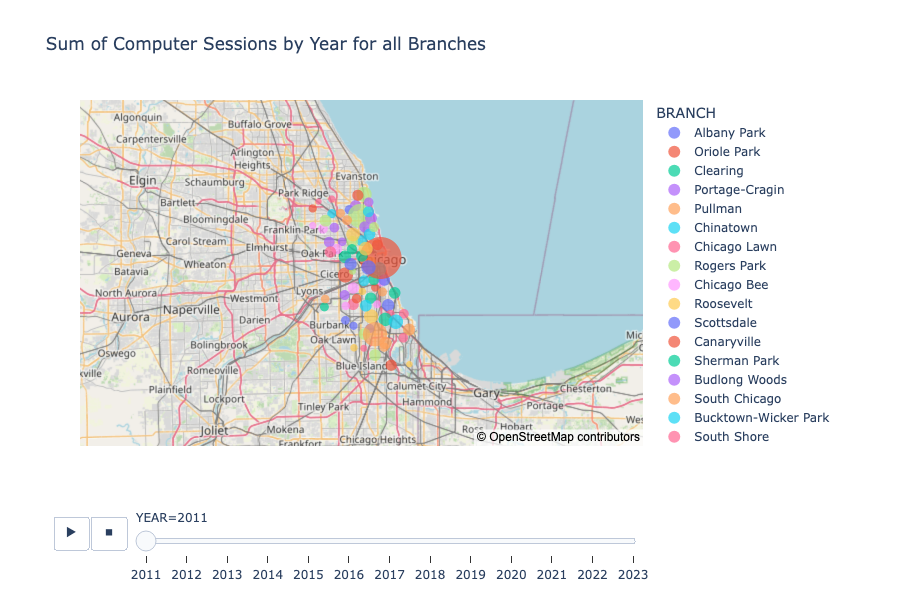

In [27]:
#df is the dataframe you would use, latitude is the latitude metric, longitude is the longitude metric, branch is the library branch name column,
#timelapse is the duration over which you want to observe your data, maptitle is the title you want for your map.
def scatterMapBoxOverTime(df,latitude,longitude,branch,metric,timelapse,maptitle):
    fig = px.scatter_mapbox(df, lat=latitude, lon=longitude, color=branch,size=metric, 
                            color_continuous_scale=["black", "purple", "red" ],
                            animation_frame= timelapse, size_max=30, height = 600,
                            width = 1000, title= maptitle, mapbox_style="open-street-map")
    return fig


figureExample = scatterMapBoxOverTime(metricsByYear,'LATITUDE','LONGITUDE','BRANCH','COMPUTER_SESSIONS','YEAR','Sum of Computer Sessions by Year for all Branches')
figureExample.show()

Things to Try:
- Visitors/Time (month to month, year to year)
- Computer Sessions per Visitor over time